In [1]:
from drug_data_exploration import *

In [2]:
cell_line = pd.read_csv("data/cell_line_quant.csv", index_col = 0)
cell_filtered = set(cell_line.index.str.split("_").str[0])

## Cancer Therapeutics Response Portal 

In [3]:
drug1_meta = parse('data/raw_drug_sensitivities/drug_sensitivity.gct')
drug1 = preprocess_cancer_therapeutics(drug1_meta)
drug1.head()

compound_name,zstk474,zebularine,ym-155,yk-4-279,xl765,wz8040,wz4002,wp1130,way-362450,vx-680,...,ac55649,abt-737,abt-199,abiraterone,aa-cocf3,a-804598,968,3-cl-ahpc,"1s,3r-rsl-3",16-beta-bromoandrosterone
cell_line_name,,,,,,,,,,,,,,,,,,,,,
SW1573,10.650,13.73,9.15,12.960,12.60,NaN,16.879999,NaN,14.830,NaN,...,14.010000,11.56,12.58,NaN,8.62,15.370,NaN,10.620,2.400,14.180
TOV21G,15.530,14.85,5.57,13.620,14.90,12.480,14.050000,11.26,NaN,NaN,...,15.460000,13.83,NaN,NaN,14.13,14.800,NaN,11.280,4.220,15.330
FTC133,13.440,14.84,8.62,13.680,15.00,14.840,14.260000,11.97,15.370,NaN,...,15.200000,9.33,12.76,NaN,12.22,14.900,NaN,10.130,8.330,15.310
DU145,12.045,14.75,9.31,13.365,14.91,11.525,13.320000,11.87,14.975,NaN,...,14.434999,14.17,14.07,NaN,12.49,14.345,NaN,10.775,7.785,14.665
DU145_dp,12.440,14.98,10.31,13.750,15.47,11.660,13.890000,12.26,15.220,NaN,...,14.670000,14.00,14.07,NaN,15.08,14.770,NaN,10.950,10.880,14.710


In [4]:
drug_filtered1 = set(drug1.index)
common_cell1 = drug_filtered1.intersection(cell_filtered)

## Genomics of Drug Sensitivity in Cancer

In [5]:
drug2_meta1 = pd.read_csv("data/raw_drug_sensitivities/drug_sensitivity1.csv")
drug2_meta2 = pd.read_csv("data/raw_drug_sensitivities/drug_sensitivity2.csv")
drug2 = preprocess_genomics_drug(drug2_meta1, drug2_meta2)
drug2.head()

Drug name,(5z)-7-oxozeaenol,5-fluorouracil,a-443654,a-770041,a-83-01,abt737,acy-1215,agi-5198,agi-6780,aica-ribonucleotide,...,ym201636,z-llnle-cho,zg-10,zm447439,zstk474,zibotentan,zoledronate,eef2k-inhibitor,kb-nb-142-70,rtrail
Cell line name,,,,,,,,,,,,,,,,,,,,,
201T,NaN,0.873656,NaN,NaN,0.975815,NaN,0.746972,NaN,0.977958,0.972249,...,0.820009,NaN,NaN,0.939383,0.735008,0.975959,NaN,0.981941,0.880037,NaN
22RV1,0.869391,0.483054,NaN,NaN,0.972267,0.924353,0.592545,0.977997,0.980507,0.906326,...,0.819324,NaN,0.847055,0.965545,0.584114,0.982725,0.969634,0.982791,0.854258,0.956057
2313287,0.766145,0.606621,NaN,NaN,0.984740,0.906474,0.633501,0.973834,0.986180,0.940375,...,0.811032,NaN,NaN,0.973132,0.685411,0.985427,0.975656,0.986005,0.876627,0.977122
42MGBA,0.663288,0.729986,NaN,NaN,0.930266,0.915711,0.810524,0.972515,0.974776,0.868926,...,0.936090,NaN,NaN,0.868125,0.918480,0.984479,0.980668,0.985491,0.879964,0.921573
451Lu,0.121474,0.954795,NaN,NaN,0.913816,NaN,0.689956,NaN,0.975005,0.949437,...,0.944600,NaN,0.812690,0.967219,0.925608,0.984059,NaN,0.986118,0.839169,0.978518


In [6]:
drug_filtered2 = set(drug2.index)
common_cell2 = drug_filtered2.intersection(cell_filtered)

## Comparison

In [7]:
print_comparison(cell_filtered, drug_filtered1, drug_filtered2, common_cell1, common_cell2)

Number of proteomic cell lines: 375
Number of drug1 cell lines: 663
Number of drug2 cell lines: 986

Number of drug1 and proteomic common cell lines: 299
Number of drug2 and proteomic common cell lines: 274

Union of drugs and proteomic cell lines: 351
==> Proportion of proteomic cell lines having drug results: 93.6%


## Is the AUC from both drug datasets comparable? 

Number of drug1 and drug2 common cell lines: 421
Number of common drugs: 98



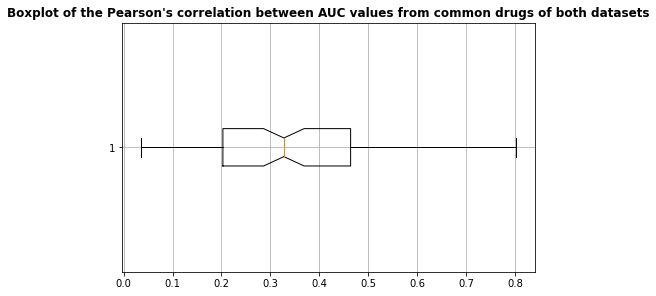

In [8]:
compare_correlation_sensitivity(drug1, drug2, drug_filtered1, drug_filtered2, verbose = True)

## They are not comparable ==> which one should be used? 

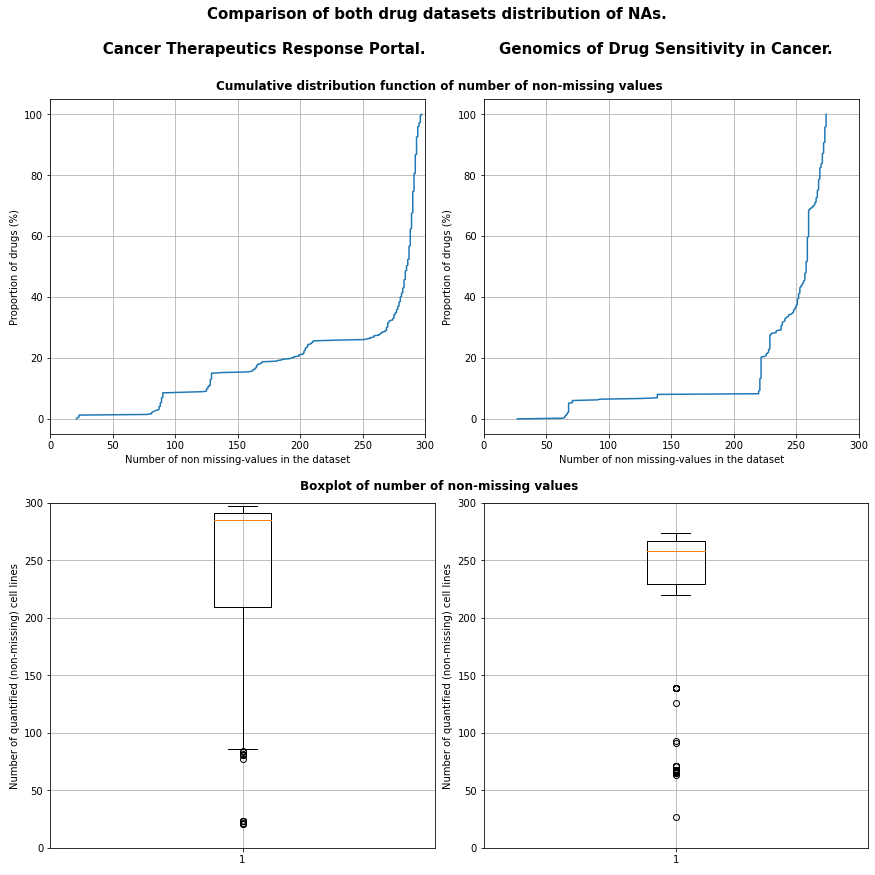

In [11]:
plot_na_drugs(drug1, drug2, common_cell1, common_cell2, mannwhitney = False)
# see comment in code to understand why it makes no sense to use a statistical test here
# spoiler: there's nothing to infer

In [10]:
# first drug dataset : 20% < 180 cell lines, 10% (between 20% and 30%) have between 200 and 270 cell line values,
#            70% (the rest above 30%) have between 270 and 300 cell lines!
# second drug dataset: 20% < 220 cell lines, 10% (between 20% and 30%) have between 220 and 230 cell line values,
#             70% (the rest above 30%) have between 230 and 275 cell lines!

# Winner: first one.
# Threshold chosen: 260 cell line values, which will keep 70% of the drugs (336/481)!